# IMAGE CLASSIFIER USING NEURAL NETWORK

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import seaborn as sns

# Taking the dataset

In [2]:
df=pd.read_csv("data/dataset.csv")

In [3]:
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.2361,0.2362,0.2363,0.2364,0.2365,0.2366,0.2367,0.2368,0.2369,0.2370
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,159,123,0,0,0,0,0,0
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,163,0,161,255,255
9,10,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,235,0,0,0,0


In [4]:
Labels=df['0.1'].values
unique_val = np.array(Labels)
np.unique(unique_val)

array([0, 1, 2], dtype=int64)

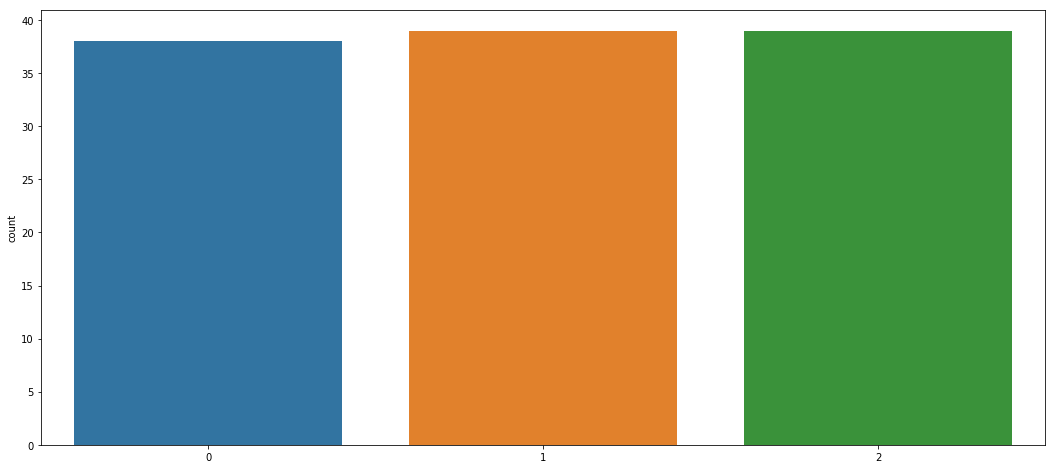

In [5]:
plt.figure(figsize = (18,8))
sns.countplot(x =Labels)

In [6]:
df.drop('0.1', axis = 1, inplace = True)
df.drop('0',axis=1,inplace=True)

In [7]:
images = df.values
images = np.array([np.reshape(i, (90, 67)) for i in images])
images = np.array([i.flatten() for i in images])

In [8]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(Labels)

In [9]:
Labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

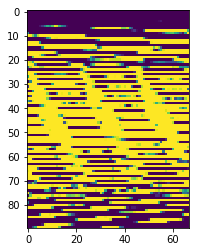

In [10]:
plt.imshow(images[0].reshape(90,67))

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


In [13]:
batch_size = 128
num_classes = 3
epochs = 50

In [14]:
x_train = x_train / 255
x_test = x_test / 255

In [15]:
x_train = x_train.reshape(x_train.shape[0], 90, 67, 1)

In [16]:
x_test = x_test.reshape(x_test.shape[0], 90, 67, 1)

In [17]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(90, 67 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [18]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 81 samples, validate on 35 samples
Epoch 1/50
81/81 [==============================] - 3s 41ms/step - loss: 1.1296 - acc: 0.2840 - val_loss: 1.1072 - val_acc: 0.2857
Epoch 2/50
81/81 [==============================] - 0s 531us/step - loss: 1.0428 - acc: 0.4074 - val_loss: 1.0265 - val_acc: 0.4286
Epoch 3/50
81/81 [==============================] - 0s 543us/step - loss: 0.9519 - acc: 0.5309 - val_loss: 0.8727 - val_acc: 0.7714
Epoch 4/50
81/81 [==============================] - 0s 605us/step - loss: 0.8113 - acc: 0.8272 - val_loss: 0.7155 - val_acc: 0.9714
Epoch 5/50
81/81 [==============================] - 0s 518us/step - loss: 0.7119 - acc: 0.8642 - val_loss: 0.6088 - val_acc: 0.7714
Epoch 6/50
81/81 [==============================] - 0s 519us/step - loss: 0.5862 - acc: 0.7901 - val_loss: 0.5631 - val_acc: 0.7143
Epoch 7/50
81/81 [==============================] - 0s 506us/step - loss: 0.4958 - acc: 0.7654 - val_loss: 0.4216 - val_acc: 0.8571
Epoch 8/50
81/81 [===============

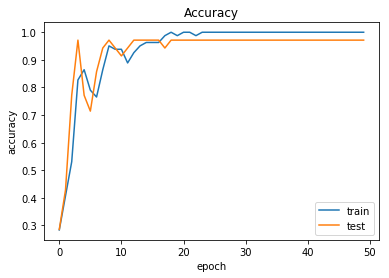

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

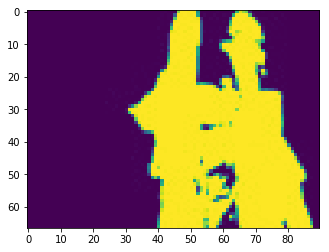

In [30]:
img=cv2.imread('test1.jpg',0)
imgplot=plt.imshow(img)

In [31]:
ans=model.predict(img.reshape(-1,90,67,1))
if(np.argmax(ans) == 0):
    print("Arm Waving Sideways")
elif (np.argmax(ans) == 1):
    print("Right Hand Waving")
elif (np.argmax(ans) == 2):
    print("Arm waving forwards")

Arm waving forwards


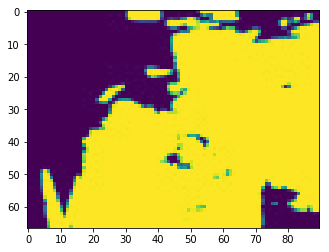

In [32]:
img=cv2.imread('test.jpg',0)
imgplot=plt.imshow(img)

In [33]:
ans=model.predict(img.reshape(-1,90,67,1))
if(np.argmax(ans) == 0):
    print("Arm Waving Sideways")
elif (np.argmax(ans) == 1):
    print("Right Hand Waving")
elif (np.argmax(ans) == 2):
    print("Arm waving forwards")

Arm Waving Sideways
